In [1]:
pip install tensorflow

In [55]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [64]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [65]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

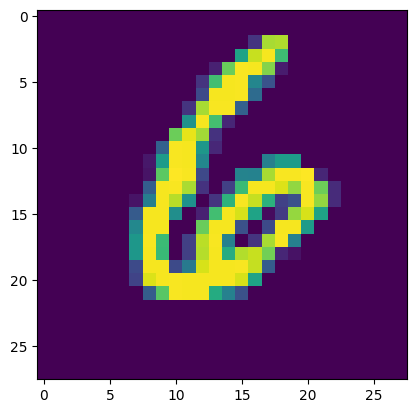

In [66]:
n = 13
plt.imshow(x_train_org[n], cmap="viridis")
plt.show()

In [67]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)


In [68]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_train.astype('float32')
x_test = x_train / 255

In [69]:
y_train_org[n]

6

In [70]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [71]:
print(y_train.shape)
y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [72]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [73]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [74]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800)               628000    
                                                                 
 dense_4 (Dense)             (None, 400)               320400    
                                                                 
 dense_5 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [75]:
model.fit(x_train, y_train, batch_size = 128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 10s 25ms/step - loss: 0.2284 - accuracy: 0.9318 - val_loss: 0.1140 - val_accuracy: 0.9649
Epoch 2/15
375/375 [==============================] - 10s 25ms/step - loss: 0.0826 - accuracy: 0.9753 - val_loss: 0.0916 - val_accuracy: 0.9731
Epoch 3/15
375/375 [==============================] - 10s 28ms/step - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.0822 - val_accuracy: 0.9751
Epoch 4/15
375/375 [==============================] - 10s 27ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 5/15
375/375 [==============================] - 9s 23ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0804 - val_accuracy: 0.9779
Epoch 6/15
375/375 [==============================] - 10s 28ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0842 - val_accuracy: 0.9799
Epoch 7/15
375/375 [==============================] - 10s 28ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0976 - val_accuracy: 

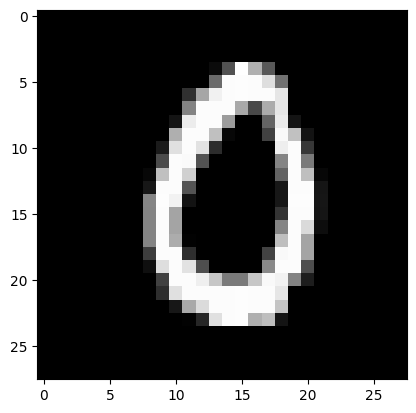

In [76]:
n_rec = 1001
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [77]:
x = x_test[n_rec]
print(x.shape)

(784,)


In [78]:
x = np.expand_dims(x, axis=0)
print(x.shape)


(1, 784)


In [79]:
prediction = model.predict(x)


1/1 [==============================] - 0s 87ms/step


In [80]:
print(prediction)

[[0.07131226 0.05799204 0.05298206 0.08477581 0.06397044 0.3207194
  0.08173256 0.0704816  0.12990008 0.06613377]]


In [81]:
prediction = np.argmax(prediction)
print(prediction)

5


In [82]:
print(y_test_org[n_rec])

0
